# This notebook generates plots for the qualitative yearbook comparisons

You will need to first generate embeddings using the notebook generate_yearbook_embeddings.

In [1]:
# import things
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tol_colors as tc

from PIL import Image
from plottools import *
from sklearn.metrics.pairwise import rbf_kernel
from weighted_exemplars import *


schemes = tc.tol_cset()
cset = tc.tol_cset('high-contrast')
colors = list(cset)

In [2]:
# image data
info = pd.read_csv("yearbook/yb_info.csv")
image_dir = 'yearbook/faces/F'
image_list = [os.path.join(image_dir, name) for name in os.listdir(image_dir) if name.endswith('.png')]
year_list = []
for name in image_list:
    year_list.append(int(name[17:21]))
info = pd.DataFrame({'filename': image_list, 'year': year_list})
info['decade'] = (10*np.floor(info.year/10)).astype(int)

embeddings = np.genfromtxt("yearbook/yb_embeddings_all.csv", delimiter=',')

targets = {}
target_list = []
for i in range(12):
    decade = 1900+10*i
    targets[decade] = np.where(info.decade==decade)[0]
    target_list.append(targets[decade])

## OK, let's see what that looks like with the faces.

I've used neural-network-based embeddings to convert the embeddings into vectors. The neural network was trained on a different image task (imagenet classification)

In [3]:
# get the median kernel
test_kernel = rbf_kernel(embeddings, gamma=1.)
unique_kernel = test_kernel[np.triu_indices(test_kernel.shape[0], k = 1)]
sigsq_face = -np.log(np.median(unique_kernel))/2
alp_face = 1./(2*sigsq_face)
K_medface = rbf_kernel(embeddings, gamma=alp_face) 

# get the per decade kernel

for target in target_list:
    test_kernel = rbf_kernel(embeddings[target, :], gamma=1.)
    unique_kernel = test_kernel[np.triu_indices(test_kernel.shape[0], k = 1)]
    sigsq_face = -np.log(np.median(unique_kernel))/2
    alp_face = 1./(2*sigsq_face)
    K_medface += rbf_kernel(embeddings, gamma=alp_face) 
    
K_medface = K_medface / (len(target_list)+1)

In [4]:
# generate some random datasets
np.random.seed(1)
rp = np.random.permutation(len(targets[1980]))

faces80s_1 = targets[1980][rp[:200]]
faces80s_2 = targets[1980][rp[200:400]]

rp = np.random.permutation(len(targets[1990]))
faces90s_1 = targets[1990][rp[:250]]
faces90s_2 = targets[1990][rp[250:500]]

rp = np.random.permutation(len(targets[2000]))
faces00s_1 = targets[2000][rp[:250]]
faces00s_2 = targets[2000][rp[250:500]]

In [5]:
# generate the corresponding exemplars and weights, independently for each dataset
exemplars_80s_1, weights_80s_1 = weighted_exemplars(K_medface, [faces80s_1], MMD_threshold=0.01, relearn_weights=False)
exemplars_80s_2, weights_80s_2 = weighted_exemplars(K_medface, [faces80s_2], MMD_threshold=0.01, relearn_weights=False)
exemplars_90s_1, weights_90s_1 = weighted_exemplars(K_medface, [faces90s_1], MMD_threshold=0.01, relearn_weights=False)
exemplars_90s_2, weights_90s_2 = weighted_exemplars(K_medface, [faces90s_2], MMD_threshold=0.01, relearn_weights=False)
exemplars_00s_1, weights_00s_1 = weighted_exemplars(K_medface, [faces00s_1], MMD_threshold=0.01, relearn_weights=False)
exemplars_00s_2, weights_00s_2 = weighted_exemplars(K_medface, [faces00s_2], MMD_threshold=0.01, relearn_weights=False)



adding exemplar 2
adding exemplar 3
adding exemplar 4
adding exemplar 5
adding exemplar 6
adding exemplar 7
adding exemplar 8
adding exemplar 9
adding exemplar 10
adding exemplar 11
adding exemplar 12
adding exemplar 13
adding exemplar 14
adding exemplar 15
adding exemplar 16
adding exemplar 17
adding exemplar 18
adding exemplar 19
adding exemplar 20
adding exemplar 21
adding exemplar 22
adding exemplar 23
adding exemplar 24
adding exemplar 25
adding exemplar 26
adding exemplar 27
adding exemplar 28
adding exemplar 29
adding exemplar 30
adding exemplar 2
adding exemplar 3
adding exemplar 4
adding exemplar 5
adding exemplar 6
adding exemplar 7
adding exemplar 8
adding exemplar 9
adding exemplar 10
adding exemplar 11
adding exemplar 12
adding exemplar 13
adding exemplar 14
adding exemplar 15
adding exemplar 16
adding exemplar 17
adding exemplar 18
adding exemplar 19
adding exemplar 20
adding exemplar 21
adding exemplar 22
adding exemplar 23
adding exemplar 24
adding exemplar 25
adding ex

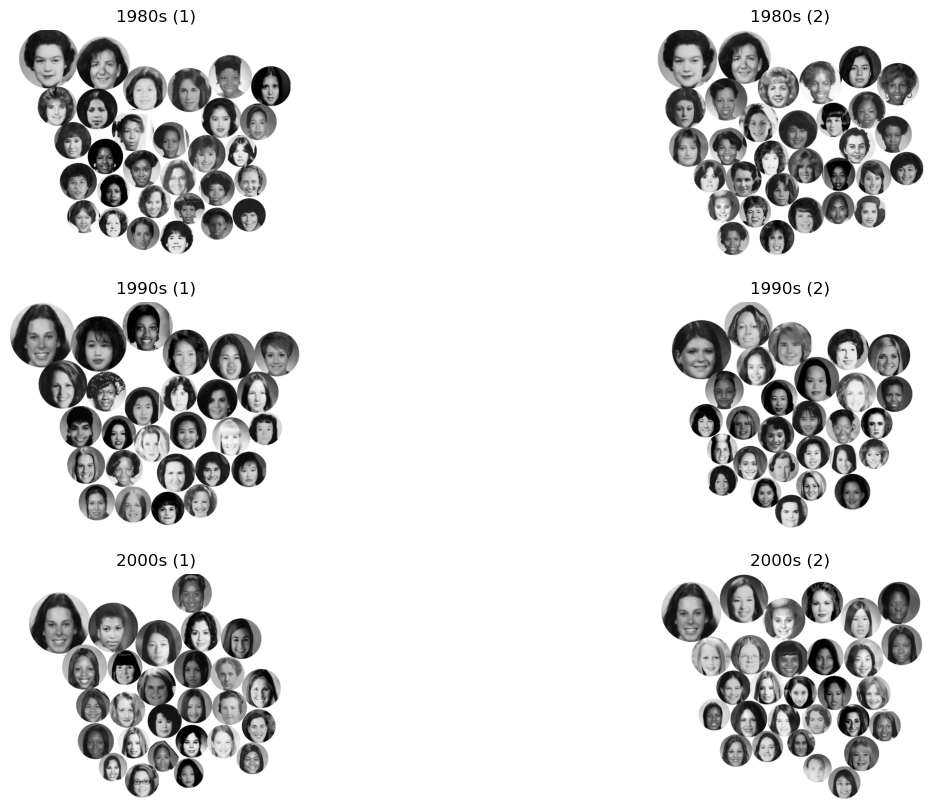

In [6]:

fig, ax = plt.subplots(3, 2, figsize=[15, 10], subplot_kw=dict(aspect="equal"))
bubble_chart = BubbleChart(area=10000*weights_80s_1[0],
                           bubble_spacing=0.01)

bubble_chart.collapse()
bubble_chart.plot(ax[0, 0], exemplars_80s_1, image_list)
ax[0,0].axis("off")
ax[0, 0].relim()
ax[0, 0].autoscale_view()
ax[0, 0].set_title('1980s (1)')

                   
bubble_chart = BubbleChart(area=10000*weights_80s_2[0],
                           bubble_spacing=0.01)

bubble_chart.collapse()
bubble_chart.plot(ax[0, 1], exemplars_80s_2, image_list)
ax[0,1].axis("off")
ax[0, 1].relim()
ax[0, 1].autoscale_view()
ax[0, 1].set_title('1980s (2)')
bubble_chart = BubbleChart(area=10000*weights_90s_1[0],
                           bubble_spacing=0.01)

bubble_chart.collapse()
bubble_chart.plot(ax[1, 0], exemplars_90s_1, image_list)
ax[1,0].axis("off")
ax[1, 0].relim()
ax[1, 0].autoscale_view()
ax[1, 0].set_title('1990s (1)')

                   
bubble_chart = BubbleChart(area=10000*weights_90s_2[0],
                           bubble_spacing=0.01)

bubble_chart.collapse()
bubble_chart.plot(ax[1, 1], exemplars_90s_2, image_list)
ax[1, 1].axis("off")
ax[1, 1].relim()
ax[1, 1].autoscale_view()
ax[1, 1].set_title('1990s (2)')

bubble_chart = BubbleChart(area=10000*weights_00s_1[0],
                           bubble_spacing=0.01)

bubble_chart.collapse()
bubble_chart.plot(ax[2, 0], exemplars_00s_1, image_list)
ax[2,0].axis("off")
ax[2, 0].relim()
ax[2, 0].autoscale_view()
ax[2, 0].set_title('2000s (1)')

                   
bubble_chart = BubbleChart(area=10000*weights_00s_2[0],
                           bubble_spacing=0.01)

bubble_chart.collapse()
bubble_chart.plot(ax[2, 1], exemplars_00s_2, image_list)
ax[2, 1].axis("off")
ax[2, 1].relim()
ax[2, 1].autoscale_view()
ax[2, 1].set_title('2000s (2)')
                
plt.show()

In [7]:
# generate the dependent exemplars
joint_exemplars, joint_weights = weighted_exemplars(K_medface, [faces90s_1, faces90s_2, faces00s_1, faces00s_2], 
                                                    MMD_threshold=0.01, relearn_weights=False)


adding exemplar 2
adding exemplar 3
adding exemplar 4
adding exemplar 5
adding exemplar 6
adding exemplar 7
adding exemplar 8
adding exemplar 9
adding exemplar 10
adding exemplar 11
adding exemplar 12
adding exemplar 13
adding exemplar 14
adding exemplar 15
adding exemplar 16
adding exemplar 17
adding exemplar 18
adding exemplar 19
adding exemplar 20
adding exemplar 21
adding exemplar 22
adding exemplar 23
adding exemplar 24
adding exemplar 25
adding exemplar 26
adding exemplar 27
adding exemplar 28
adding exemplar 29
adding exemplar 30
adding exemplar 31
adding exemplar 32
adding exemplar 33
adding exemplar 34
adding exemplar 35
adding exemplar 36
adding exemplar 37


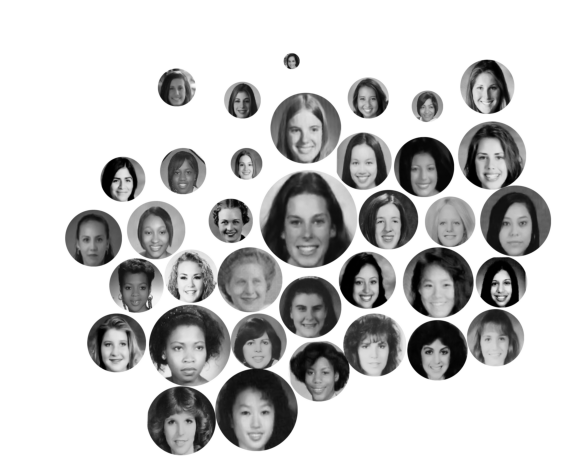

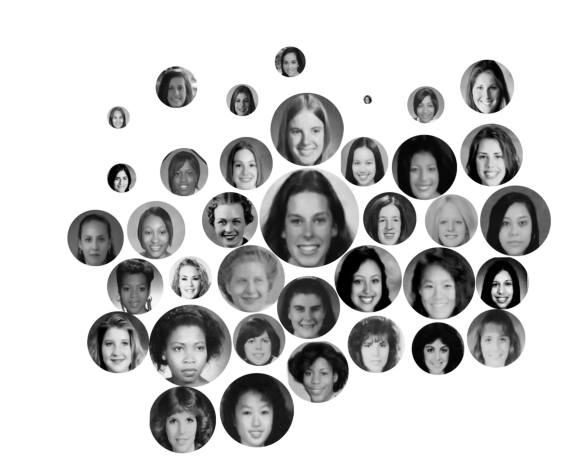

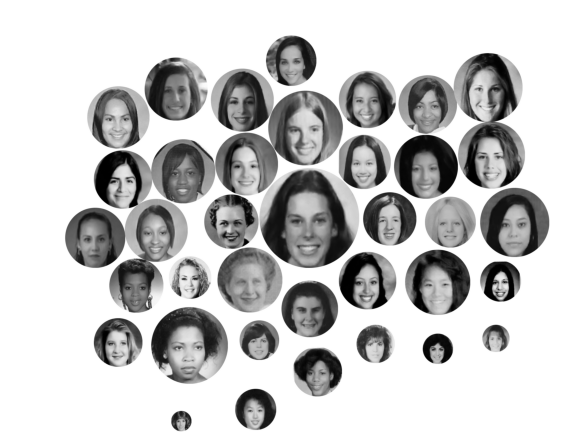

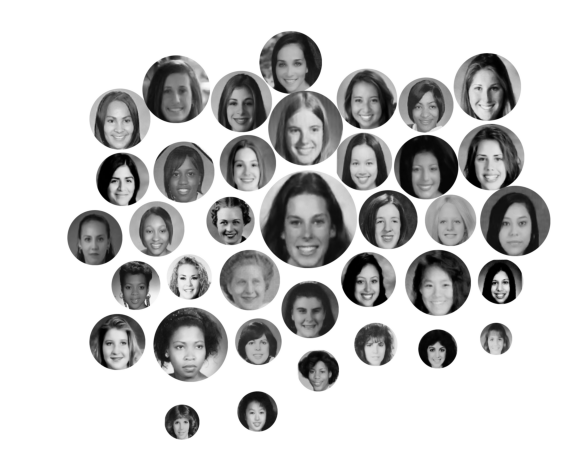

In [8]:
# generate joint coreset visualization
weight_diff = (joint_weights[0] + joint_weights[1]) - (joint_weights[2] + joint_weights[3])

weight_order = np.argsort(weight_diff)

max_weights = [np.max([weights[i] for weights in joint_weights.values()]) for i in range(len(joint_exemplars))]
max_weights = np.array(max_weights)
# considering without collapse
bubble_chart = BubbleChart(area=20000*max_weights[weight_order],
                           bubble_spacing=0.1)


bubble_chart.collapse()


for j in range(4):
    fig, ax = plt.subplots(1, 1, figsize=[7, 7], subplot_kw=dict(aspect="equal"))
    area = np.asarray(20000*joint_weights[j][weight_order])
    r = np.sqrt(area / np.pi)

    bubble_chart.bubbles[:, 2] = r
    bubble_chart.bubbles[:, 3] = area

    
    bubble_chart.plot(ax, joint_exemplars[weight_order], image_list)
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    plt.show()

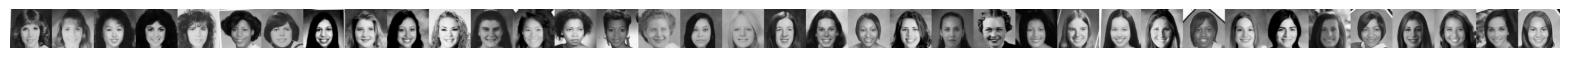

In [9]:
# plot ordered weights
weight_diff = (joint_weights[0] + joint_weights[1]) / (joint_weights[2] + joint_weights[3])

weight_order = np.argsort(weight_diff)
ordered_ind = np.argsort(weight_diff)[::-1]
plot_ordered_weights(joint_exemplars[ordered_ind], weight_diff[ordered_ind], image_list)

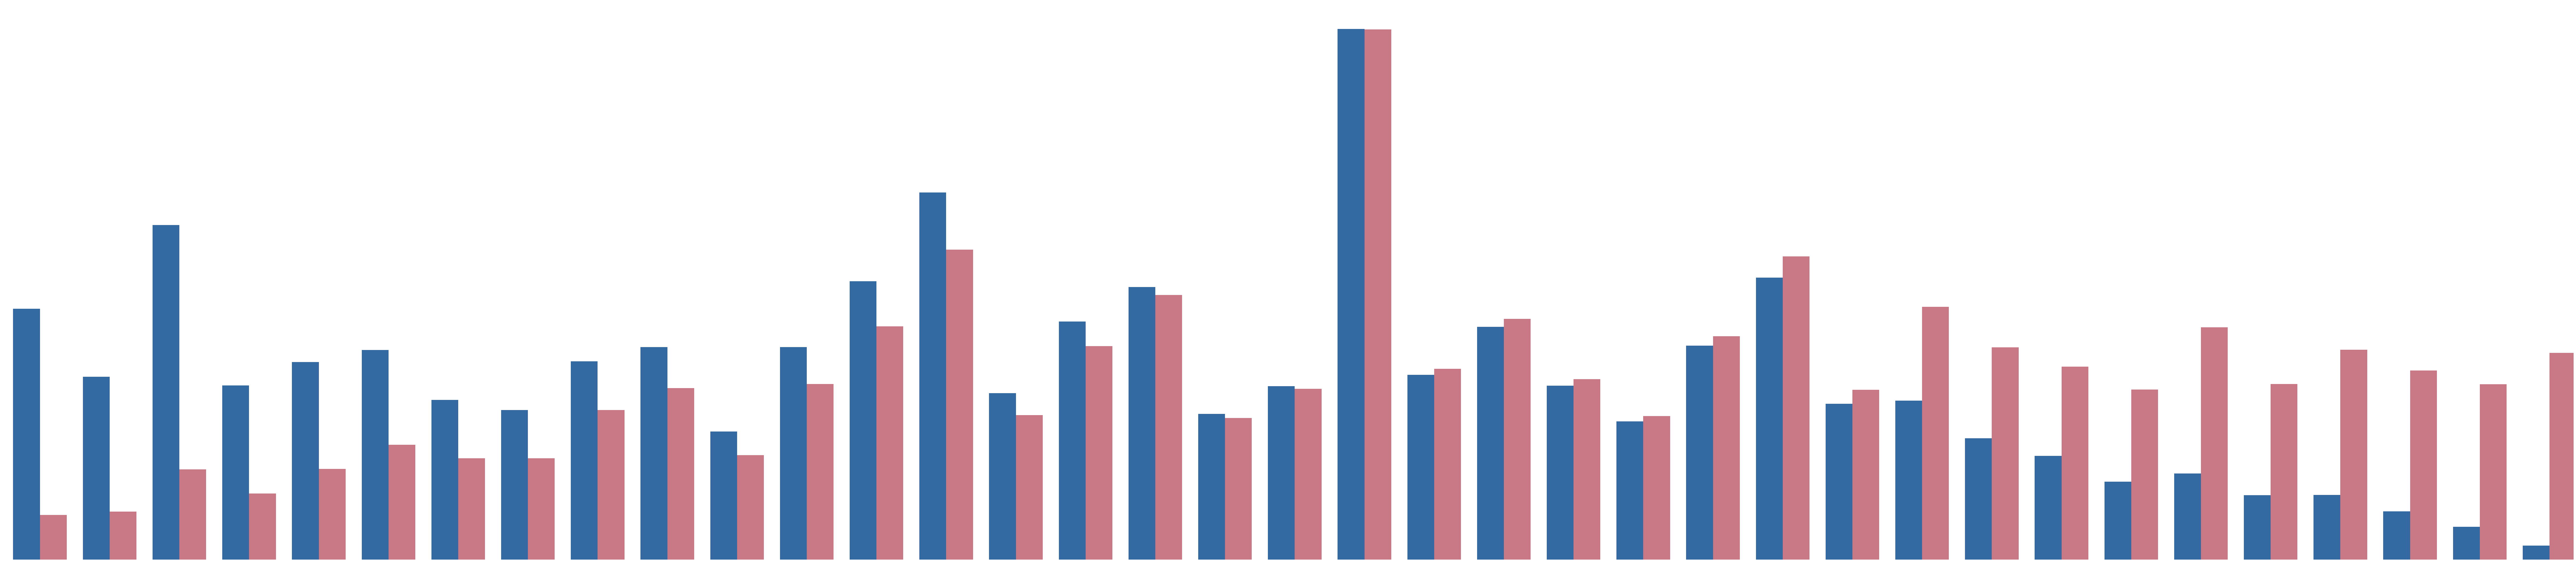

In [10]:
# corresponding histogram

width = Image.open(image_list[0]).size[0] * len(joint_exemplars)

weights_90s = (joint_weights[0][ordered_ind] + joint_weights[1][ordered_ind])/2.
weights_00s = (joint_weights[2][ordered_ind] + joint_weights[3][ordered_ind])/2.

fig, ax = plt.subplots(1, 1, figsize= (width/50, 30))
ax.bar(x=1.3*np.arange(len(weight_diff))+0.25, height=weights_90s, width=0.5, color=colors[0], align='center', alpha=0.8)
ax.bar(x=1.3*np.arange(len(weight_diff))+0.75, height=weights_00s, width=0.5, color=colors[2], align='center', alpha=0.8)
ax.set_xlim(-0.2, np.max(1.2-.25 +1.3*np.arange(len(weight_diff))))
ax.axis('off')
plt.show()

# Next, generate the weights over time

In [11]:
temporal_exemplars, temporal_weights =weighted_exemplars(K_medface, target_list, MMD_threshold=0.01, 
                                                         relearn_weights=False)


adding exemplar 2
adding exemplar 3
adding exemplar 4
adding exemplar 5
adding exemplar 6
adding exemplar 7
adding exemplar 8
adding exemplar 9
adding exemplar 10
adding exemplar 11
adding exemplar 12
adding exemplar 13
adding exemplar 14
adding exemplar 15
adding exemplar 16
adding exemplar 17
adding exemplar 18
adding exemplar 19
adding exemplar 20
adding exemplar 21
adding exemplar 22
adding exemplar 23
adding exemplar 24
adding exemplar 25
adding exemplar 26
adding exemplar 27
adding exemplar 28
adding exemplar 29
adding exemplar 30
adding exemplar 31
adding exemplar 32
adding exemplar 33
adding exemplar 34
adding exemplar 35
adding exemplar 36
adding exemplar 37
adding exemplar 38
adding exemplar 39
adding exemplar 40
adding exemplar 41
adding exemplar 42
adding exemplar 43
adding exemplar 44
adding exemplar 45
adding exemplar 46
adding exemplar 47
adding exemplar 48
adding exemplar 49
adding exemplar 50
adding exemplar 51
adding exemplar 52
adding exemplar 53
adding exemplar 54
a

# And, plot

In [ ]:
sum_weights = [np.sum([temporal_weights[t][i] for t in range (len(temporal_weights))]) for i in range(len(temporal_exemplars))]

weight_order = np.argsort(sum_weights)[::-1]
plot_weights_over_time(temporal_weights, temporal_exemplars, info, num_cols=5, order=weight_order)

# Look at years of exemplars vs years of datasets

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW
exemplar_years = info.year[temporal_exemplars]
print('overall unweighted exemplars: mean={}, sd={}'.format(np.mean(exemplar_years), np.std(exemplar_years)))
mean_year = []
sd_year = []
for i in range(len(temporal_weights)):
    weighted_stats = DescrStatsW(exemplar_years, weights=temporal_weights[i], ddof=0)
    mean_year.append(weighted_stats.mean)
    sd_year.append(weighted_stats.std)
plt.errorbar(x=list(targets.keys()), y=mean_year, yerr=sd_year)
plt.xlabel('dataset decade')
plt.ylabel('exemplar year')
plt.show()
      